In [1]:
# Required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Stock market data
smarket =pd.read_csv("Smarket.csv")
smarket.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
# Logistic regression
formula = 'Direction ~Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
model = smf.glm(formula = formula, data=smarket, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 28 Apr 2021   Deviance:                       1727.6
Time:                                          09:45:43   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [4]:
SM=smarket.drop([smarket.columns[0],'Direction'],axis=1)
SM.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [5]:
sm1=smarket.drop([smarket.columns[0]],axis=1)
sm1.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


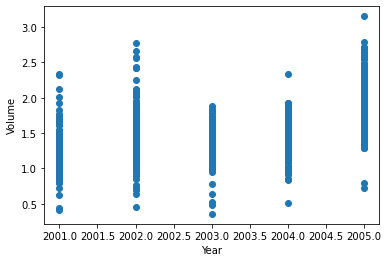

In [6]:
plt.scatter(smarket['Year'],smarket['Volume'],label="data")
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

In [7]:
for i in range(2001,2006):
    sum=0;
    cnt=0;
    for j in range(1250):
        if sm1.iloc[j]['Year']==i:
            sum=sum +sm1.iloc[j]['Volume']
            cnt+=1;
    avg =sum/cnt;       
    print("Average volume for year "+ str(i) + " is "+ str(avg))

Average volume for year 2001 is 1.226949504132231
Average volume for year 2002 is 1.428451388888889
Average volume for year 2003 is 1.384693055555556
Average volume for year 2004 is 1.4241585317460321
Average volume for year 2005 is 1.9172980952380967


In [8]:
def predictor(pred):   
   x=[]
   for i in range(pred.size):
     if pred[i]>0.5:
         x.append("Up")
     else:
         x.append('Down')
   return x  

In [ ]:
def 

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
x =predictor(result.predict())
x=np.array(x)
y=smarket['Direction'].tolist()
cmtx = pd.DataFrame(
    confusion_matrix(y, x ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Down', 'pred:Up']
)
acc=(507+145)/1250
print(cmtx)
print(acc)

           pred:Down  pred:Up
true:Up          141      507
true:Down        145      457
0.5216


In [16]:
tren=smarket.loc[smarket['Year']!=2005]
test=smarket.loc[smarket['Year']==2005]
tes1=test
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'
model_ = smf.glm(formula = formula, data=tren, family=sm.families.Binomial())
result1 = model_.fit()
pred1=result1.predict(tes1).to_numpy()
z= predictor(pred1)
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], z ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Down', 'pred:Up']
)
print(cmtx)
print(121/252)

           pred:Down  pred:Up
true:Up           97       44
true:Down         77       34
0.4801587301587302


In [17]:
formula = 'Direction ~ Lag1+Lag2'
modelred = smf.glm(formula = formula, data=tren, family=sm.families.Binomial())
resulred =modelred.fit()
predred= resulred.predict(tes1).to_numpy()
p =np.array(predictor(predred))
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], p ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Down', 'pred:Up']
)
print(cmtx)


           pred:Down  pred:Up
true:Up           35      106
true:Down         35       76


In [20]:
# Linear Discriminant analysis
model =LDA()
trainnew =tren[['Lag1','Lag2']]
testnew =test[['Lag1','Lag2']]
model.fit(trainnew,tren['Direction'])
ypred=model.predict(testnew)
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], ypred ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Up', 'pred:Down']
)
print(cmtx)
print(accuracy_score(y[998:],ypred))

           pred:Up  pred:Down
true:Up        106         35
true:Down       76         35
0.5595238095238095


In [13]:
print(model.priors_)
print(model.means_)

[0.49198397 0.50801603]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [14]:
print(model.coef_)

[[-0.05544078 -0.0443452 ]]


In [15]:
predp= model.predict_proba(testnew)
sump=0
for i in range (252):
    if predp[i,1]>0.5:
       sump+=1
print(sump)
print(252-sump)

182
70


In [21]:
# Quadratic Analysis
model2=QDA()
model2.fit(trainnew,tren['Direction'])
ypred2=model2.predict(testnew)
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], ypred2 ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Up', 'pred:Down']
)
print(cmtx)
print(accuracy_score(y[998:],ypred2))

           pred:Up  pred:Down
true:Up        121         20
true:Down       81         30
0.5992063492063492


In [22]:
#K nearest neighbours
KNN_model= KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(trainnew,tren['Direction'])
y_pred= KNN_model.predict(testnew)
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], y_pred ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Up', 'pred:Down']
)
print(cmtx)
print(accuracy_score(y[998:],y_pred))

           pred:Up  pred:Down
true:Up         83         58
true:Down       68         43
0.5


In [23]:
#K nearest neighbours
KNN_model= KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(trainnew,tren['Direction'])
y_pred= KNN_model.predict(testnew)
cmtx = pd.DataFrame(
    confusion_matrix(y[998:], y_pred ,labels=['Up', 'Down']), 
    index=['true:Up', 'true:Down'], 
    columns=['pred:Up', 'pred:Down']
)
print(cmtx)
print(accuracy_score(y[998:],y_pred))

           pred:Up  pred:Down
true:Up         86         55
true:Down       63         48
0.5317460317460317


In [29]:
#knn on caravan dataset 
carvan =pd.read_csv("Caravan.csv")
carvan.head()


,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [30]:
carv=carvan.drop([carvan.columns[0],'Purchase'],axis=1)
print(carv.shape)
cnt=0
for i in range (5822):
    if carvan.iloc[i]['Purchase']=='Yes':
       cnt+=1
print(cnt/5822)        

(5822, 85)
0.05977327378907592


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
test_ =carvan.iloc[0:1000,:]
train_ = carvan.iloc[1000: ,:]
train1=train_.drop('Purchase',axis=1)
test1=test_.drop('Purchase',axis=1)
pipline= Pipeline([ ('std_scaler', StandardScaler())])
train1=pipline.fit_transform(train1)
test1=pipline.fit_transform(test1)
KNN_=KNeighborsClassifier(n_neighbors=1)
KNN_.fit(train1,train_['Purchase'])
ypred = KNN_.predict(test1)
x=np.mean(test_['Purchase']!='No')
x1=np.mean(test_['Purchase']!=ypred)
print(x)
print(x1)
cmtx = pd.DataFrame(confusion_matrix(test_['Purchase'], ypred ,labels=['Yes', 'No']), 
    index=['true:Yes', 'true:No'], 
    columns=['pred:Yes', 'pred:No']
)
print(cmtx)

0.059
0.118
          pred:Yes  pred:No
true:Yes         8       51
true:No         67      874


In [33]:
KNN__=KNeighborsClassifier(n_neighbors=3)
KNN__.fit(train1,train_['Purchase'])
ypred = KNN__.predict(test1)

cmtx = pd.DataFrame(confusion_matrix(test_['Purchase'], ypred ,labels=['Yes', 'No']), 
    index=['true:Yes', 'true:No'], 
    columns=['pred:Yes', 'pred:No']
)
print(cmtx)

          pred:Yes  pred:No
true:Yes         4       55
true:No         18      923


In [34]:
KNN__=KNeighborsClassifier(n_neighbors=5)
KNN__.fit(train1,train_['Purchase'])
ypred = KNN__.predict(test1)

cmtx = pd.DataFrame(confusion_matrix(test_['Purchase'], ypred ,labels=['Yes', 'No']), 
    index=['true:Yes', 'true:No'], 
    columns=['pred:Yes', 'pred:No']
)
print(cmtx)

          pred:Yes  pred:No
true:Yes         2       57
true:No          7      934


In [35]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()
Logistic_model.fit(train1,train_['Purchase'])
pred_=Logistic_model.predict_proba(test1)
ypred__=[]
for i in range (1000):
    if pred_[i][1]>0.25:
       ypred__.append('Yes')
    else:
       ypred__.append('No')
cmtx = pd.DataFrame(confusion_matrix(test_['Purchase'], ypred__ ,labels=['Yes', 'No']), 
    index=['true:Yes', 'true:No'], 
    columns=['pred:Yes', 'pred:No']
)
print(cmtx)

          pred:Yes  pred:No
true:Yes         6       53
true:No         23      918


C:\Users\Divyesh12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
ypred__=[]
for i in range (1000):
    if pred_[i][1]>0.5:
       ypred__.append('Yes')
    else:
       ypred__.append('No')
cmtx = pd.DataFrame(confusion_matrix(test_['Purchase'], ypred ,labels=['Yes', 'No']), 
    index=['true:Yes', 'true:No'], 
    columns=['pred:Yes', 'pred:No']
)
print(cmtx)

          pred:Yes  pred:No
true:Yes         2       57
true:No          7      934
